In [1]:
if !isdefined(Main, :CAVIEx)
    include("src/CAVIEx.jl");
end
using .CAVIEx

# Instances
include("src/instances/InstanceDemo.jl");
include("src/instances/InstanceNMF.jl");
include("src/instances/InstancePMF.jl");

In [2]:
m₁ = 10;
m₂ = 10;
m = m₁ * m₂;
seed = 400;
biasmu = 10.0;
realkappa = 10.0;

instance = InstancePMF(m₁, m₂, seed=seed, biasmu=biasmu, realkappa=realkappa);

In [3]:
n_epoch = 2;
epoch_size = 10;
hp0 = [zeros(m)..., ones(m)..., 1.0, 1.0];

MCKL = runCAVI(n_epoch, epoch_size, hp0, instance.model);

Minimization made in 0.221582833 s


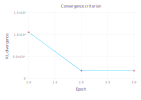

In [4]:
plotConvergenceCriterion(MCKL)

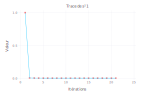

In [5]:
plotTrace(instance.model, :s²1)

In [6]:
n_iter = 10000;

runMCMC!(instance.model, n_iter)

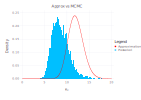

In [7]:
a = 0;
b = 20;
step = .001;

plotApproxVSMCMC(instance.model, :κᵤ, a, b, step)